# **DATA PROJECT 2024: DO INTERENATIONAL WORKERS IN DENMARK REMEDY LABOR SHORTAGE?**

By Emma Knippel, Anna Abildskov and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Introduction](#toc1_) 

* [Read and clean data](#toc2_)    

* [Exploring the data sets](#toc3_)    

* [Merging data sets of employment and international labor](#toc4_)   

* [Analysis](#toc5_) 

* [Conclusion](#toc6_) 

## <a id='toc0_'></a>[Setup](#toc0_)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import json

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import dataproject #importing our own py-file with our code.

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/nv/gh_9g_b93_z6x49mmqm4t2ph0000gn/T/pip-req-build-ewdbhmiw
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/nv/gh_9g_b93_z6x49mmqm4t2ph0000gn/T/pip-req-build-ewdbhmiw
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## <a id='toc1_'></a>[Introduction](#toc1_)

## <a id='toc1_'></a>[Read and clean data](#toc1_)

In this section, we import data and clean it for usage later on. Our data comes from two different sources: Statistics Denmark and Jobindsats (STAR). 

We import four different datasets from DST through API: production limitations in the sectors of manufacturing, construction, and service and amount employees in all industries and sub-industries. The production limititations will give us the data we need regarding labor shortage in all different industries and sub-industries. 

From STAR, we download a JSON file, which is stored locally in this folder. This file contains data on the amount of international employees in sub-industries in the service sector, which we will need for comparing the share of international employees to laber shortage. 


In [22]:
# importing the data from DST
employees = DstApi('LBESK03')
lb_short_service = DstApi('KBS2')
lb_short_manu = DstApi('BARO3')
lb_short_cons = DstApi('KBYG33')

**Cleaning all five datasets**

The code for the cleaning of all datasets, along with comments of the process, can be found in the seperate dataproject.py file. 

In [23]:
int_labor = dataproject.clean_json_data()
int_labor.head(5)

Before cleaning, the JSON datafile from JobIndsats contains 1089 observations and 5 variables.
We have removed two columns and renamed the remaining.
The dataset now contains 1089 observations and 3 variables.
All our observations are of type: <class 'str'>. We want them to be integers.
The observations are now of type: <class 'numpy.float64'> and the first observation is: 2.184
The observations are now of type: <class 'numpy.int64'> and the first observation is: 2184
We convert our time Variable into datetime variables.
We now convert the DataFrame using the .pivot method, using time as index, industries as columns and international labor as our observations.
All our industries are in Danish, so we rename them to English.
For our dataset to match the data from DST, we sum over all industries to get the total and combine four of the industires so that they match
Lastly, we drop the industries, that we have just combined to make new ones.
The cleaned dataset now contains 8 columns (indu

industry,hotels_restaurents,information_communictaion,cleaning_etc,transport,research_consultancy,total,finance_real_estate,culture_leisure_other
time,,,,,,,,
2014-01-01,17609,6657,26549,14777,9039,86158,4684,6843
2014-02-01,17957,6815,26792,14732,9137,86993,4690,6870
2014-03-01,18481,7001,27667,14975,9292,89550,4841,7293
2014-04-01,19209,7136,28547,15177,9611,92029,4928,7421
2014-05-01,19909,7342,29802,15380,9539,94728,5103,7653


In [24]:
empl = dataproject.clean_dst_empl(employees)
empl.head(5)

Since we have extracted all the data from the source on DST, we need to select only the variables that are relevant for our analysis
For the employment data, we first define our parameters so that we get only data from january 2014 to january 2024 and only for the total of industries.
Then, we retract the parameters we defined, into our DataFrame, drop the industry since we do not need to split the data on industry, and rename the columns to english, simple titles.
The cleaned dataset contains 2 columns and 121 observations.


,time,employees
0,2014M01,2561675
1,2014M02,2563945
2,2014M03,2566733
3,2014M04,2569268
4,2014M05,2570962


In [25]:
lab_short_service = dataproject.clean_dst_shortage1(lb_short_service)
lab_short_service.head(5)

Again, as for all the DST data, we need to select only the variables that are relevant for our analysis
For the labor shortage data, we need to sort through the dataset a bit more when defining out variables:
We need to specify which industries we want to get data from, since the dataset contains both broad and narrow categories.
Furhtermore, we want to get data only for the labor shortage and from january 2014 to january 2024.
We retrieve the parameters and sort the data by time and industry.
Then, we drop the column, TYPE, since we only have data for the labor shortage anyways, and this column would otherwise be used to split the data into diffeereeent categories of production limitations.
We also drop the old index and reset it.
We rename the industry codes to the industry names, so that they match the industries in the international labor data.
We convert the time variable into datetime variables.
The cleaned dataset contains 3 columns and 968 observations.


,industry,time,labor_shortage
0,culture_leisure,2014-01-01,6
1,cleaning_etc,2014-01-01,13
2,information_communication,2014-01-01,9
3,research_consultancy,2014-01-01,19
4,finance_real_estate,2014-01-01,0


In [26]:
lab_short_manu = dataproject.clean_dst_shortage2(lb_short_manu)
lab_short_manu.head(5)

Again, as for all the DST data, we need to select only the variables that are relevant for our analysis
We retreieve the parameters we defined into the DataFrame and sort the variables by time.
We then rename the columns to english, simple titles and reset the index.
We drop the industry and type columns, since we onle neeed data for the total industry
Finally, we set the time variable to datetime variables.
The cleaned dataset contains 2 columns and 41 observations.
The reason that the number of observations differ, is that manufacturing labor shortagae data is only publishedc once a quarter.


,time,labor_shortage
0,2014-01-01,1
1,2014-04-01,3
2,2014-07-01,2
3,2014-10-01,3
4,2015-01-01,2


In [27]:
lab_short_cons = dataproject.clean_dst_shortage3(lb_short_cons)
lab_short_cons.head(5)

The method for the cleaning of this dataset is exactly the same as for the manufacturinng sector.
The cleaned dataset contains 2 columns and 121 observations.


,time,labor_shortage
0,2014-01-01,3
1,2014-02-01,2
2,2014-03-01,3
3,2014-04-01,3
4,2014-05-01,2


## Explore each data set

In this section we explore the cleaned datasets and use these as the basis of our analysis. 

**1) Development of labor shortage by industry**

A static graph showing the development of laber shortage for the timeperiod Janurary 2014 - January 2024, of all three industries; manufacturing, construction, and service. 

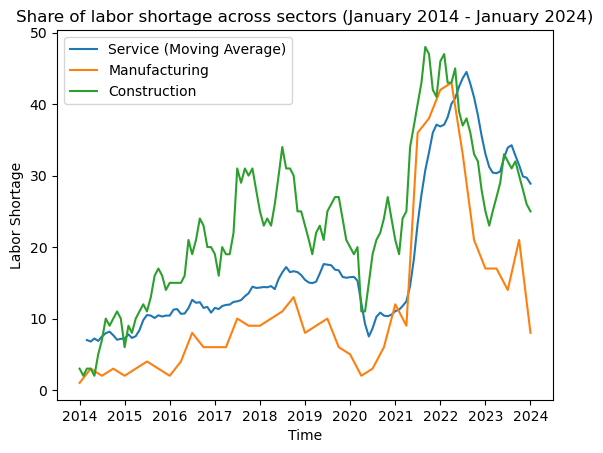

In [28]:
data = {'time': ['2014M01', '2014M02', '2014M03']}
df = pd.DataFrame(data)

df[['Year', 'Month']] = df['time'].str.extract(r'(\d{4})M(\d{2})')

df['time'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

df.drop(['Year', 'Month'], axis=1, inplace=True)

lab_short_service['time'] = pd.to_datetime(lab_short_service['time'], format='%Y-%m-%d')
average_labor_shortage = lab_short_service.groupby('time')['labor_shortage'].mean()
moving_average = average_labor_shortage.rolling(window=3).mean()
lab_short_manu['time'] = pd.to_datetime(lab_short_manu['time'], format='%Y-%m-%d')
lab_short_cons['time'] = pd.to_datetime(lab_short_cons['time'], format='%Y-%m-%d')

plt.plot(moving_average, label='Service (Moving Average)')
plt.plot(lab_short_manu['time'], lab_short_manu['labor_shortage'], label='Manufacturing')
plt.plot(lab_short_cons['time'], lab_short_cons['labor_shortage'], label='Construction')

plt.xlabel('Time')
plt.ylabel('Labor Shortage')
plt.title('Share of labor shortage across sectors (January 2014 - January 2024)')
plt.legend()

plt.show()


FORKLARING AF GRAF - hva sker der??

**2) Interactive plot of development of amount of international employees for all sub-industries in the service sector**

As seen above, the trend of labor shortage for both the manufacturing and construction is going downwards, while the service sector is starting to go slightly upwards again. We therefor focus our energy on the service industry going forward.

Below is an interactive graph displaying the amount of international workers for the service sector as a total and for all seven sub-industries; finance, insurance, and real estate, hotels and restaurents, information and communication, cleaning and other operational services, transport, research and consultancy, and culture, leisure, and other services. 

In [32]:
import plotly.graph_objects as graph
from plotly.subplots import make_subplots

# Create a Plotly figure with a dropdown menu
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add traces for each variable/industry:
for column in int_labor.columns:
    fig.add_trace(graph.Scatter(x=int_labor.index, y=int_labor[column], mode='lines', name=column))

# Update layout to include a dropdown menu
buttons = []
for column in int_labor.columns:
    buttons.append(dict(method='restyle',
                        label=column,
                        visible=True,
                        args=[{'y': [int_labor[column]]}],
                        args2=[{'yaxis.type': 'log'}]))

fig.update_layout(updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}])

# Show the figure
fig.show()

print('Ann.: the code for this graph was made with help from AI. We tried to achieve the same using widgets, but it was not working')
print('When we asked AI for help, it suggested using plotly and subplots, adding traces for each industry in our dataset.')

Ann.: the code for this graph was made with help from AI. We tried to achieve the same using widgets, but it was not working
When we asked AI for help, it suggested using plotly and subplots, adding traces for each industry in our dataset.


Using the dropdown menu on the left, it allows to shift through all industries. 

The sub-industries of information and communication, research and consultancy, and transport show a clear upwards trend in international labor, while the overall industry and all other sub-industries show a slight downwards trend after mid/end 2023.

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.